In [30]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
file_path = "/Users/pragathi/Nat Gas.csv"
date_column = "Dates" 
date_format = "%m/%d/%y"
price_data = pd.read_csv(file_path,index_col=date_column,parse_dates=[date_column],date_format= date_format)

In [3]:
price_data.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


In [4]:
price_data.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


<Axes: xlabel='Dates'>

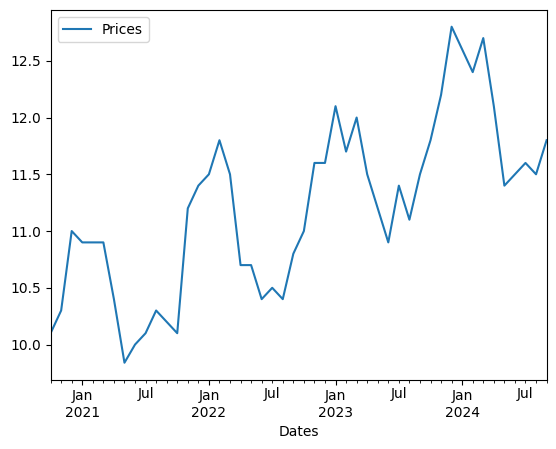

In [5]:
price_data.plot()

# Test for stationarity 

In [12]:
def adf_test(series):
    """
    # Using ADF test for stationarity
    # Null hypothesis: The lag distribution has unit root (Which implies the series is nonstationary)
    # Alternate hypothesis: Negation of null hypothesis 
    """
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    p_value = result[1]
    LOI = 0.05
    if(p_value <= LOI):
        print("Null hypothesis is rejected: The series is stationary")
    else:
        print("There is no enough evidence to reject the null hypothesis: The series is non stationary")

In [13]:
original_values = price_data['Prices'].values
adf_test(original_values)

ADF Statistic: 0.218077
p-value: 0.973257
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
There is no enough evidence to reject the null hypothesis: The series is non stationary


In [15]:
def log_transform(series):
    return np.log(series)

In [16]:
def sq_root(series):
    return np.sqrt(series)

In [17]:
def cube_root(series):
    return np.cbrt(series)

In [18]:
def differencing(series,period=2):
    return series.diff(periods=period)

In [19]:
log_series = log_transform(original_values)
adf_test(log_series)

ADF Statistic: -0.049701
p-value: 0.954224
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
There is no enough evidence to reject the null hypothesis: The series is non stationary


In [20]:
sqrt_series = sq_root(original_values)
adf_test(sqrt_series)

ADF Statistic: 0.084402
p-value: 0.964980
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
There is no enough evidence to reject the null hypothesis: The series is non stationary


In [23]:
lag_1_series = differencing(price_data['Prices'],1)
lag_1_series.fillna(0, inplace=True)
adf_test(lag_1_series)

ADF Statistic: -6.985702
p-value: 0.000000
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609
Null hypothesis is rejected: The series is stationary


<Axes: xlabel='Dates'>

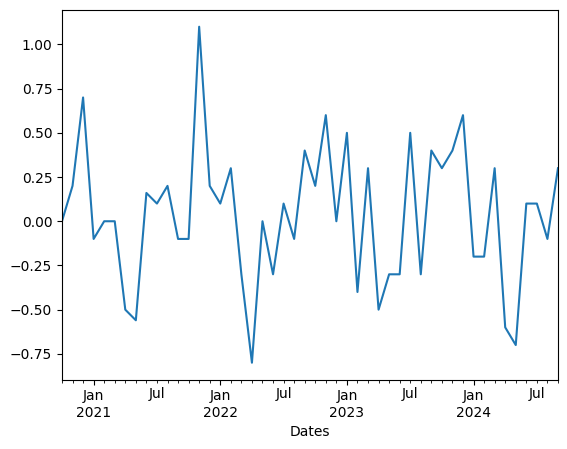

In [24]:
lag_1_series.plot()

[]

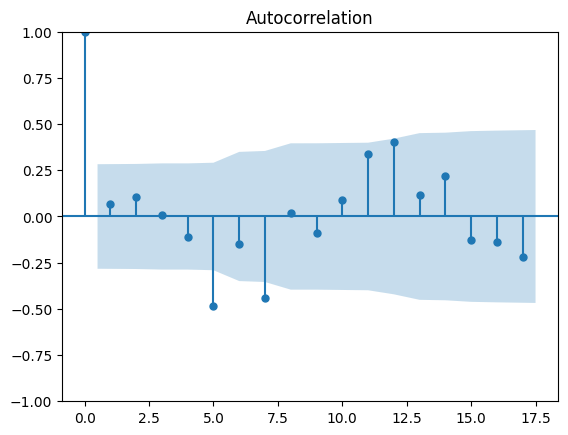

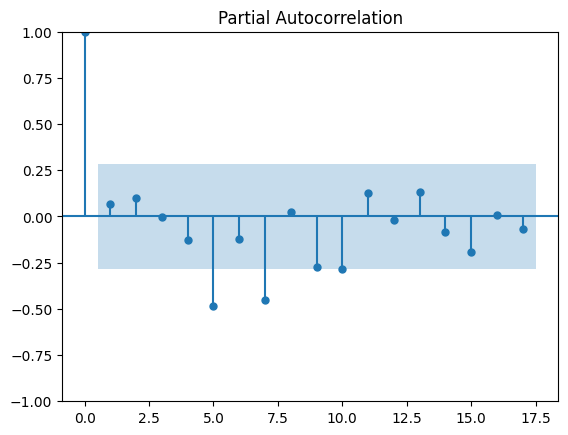

In [28]:
plot_acf(lag_1_series)
plot_pacf(lag_1_series)
plt.plot()

# Model Prediction

In [56]:
p = 10  # Order of autoregression
d = 0   # Order of differencing
q = 0  # Order of moving average
model = ARIMA(price_data['Prices'], order=(p, d, q))
results = model.fit()

# Forecast future values
n_forecast = 10  # Number of periods to forecast
forecast = results.get_forecast(steps=n_forecast)

/Users/pragathi/opt/anaconda3/envs/new_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/pragathi/opt/anaconda3/envs/new_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/pragathi/opt/anaconda3/envs/new_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [59]:
forecast.predicted_mean

2024-10-31    12.052613
2024-11-30    12.351062
2024-12-31    12.486255
2025-01-31    12.423633
2025-02-28    12.328839
2025-03-31    12.182546
2025-04-30    11.840591
2025-05-31    11.674934
2025-06-30    11.558223
2025-07-31    11.535729
Freq: M, Name: predicted_mean, dtype: float64

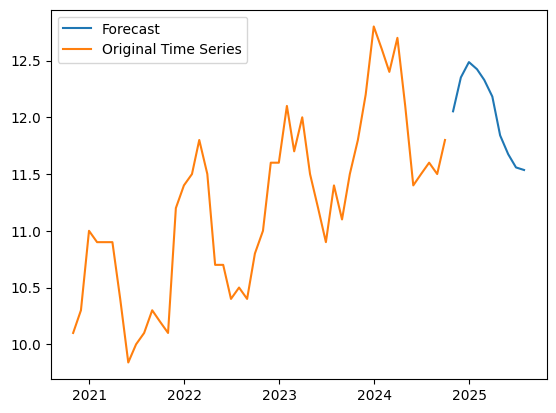

In [58]:
plt.plot(list(forecast.tvalues.index), forecast.predicted_mean, label='Forecast')
plt.plot(price_data['Prices'], label='Original Time Series')
plt.legend()
plt.show()

# Main Function

In [61]:
if __name__=="__main__": 
    str_input = input()
    specific_date = datetime.strptime(str_input, '%Y-%m-%d')
    print("The estimated price is: ",forecast.predicted_mean[specific_date])

The estimated price is:  12.351061746780497
